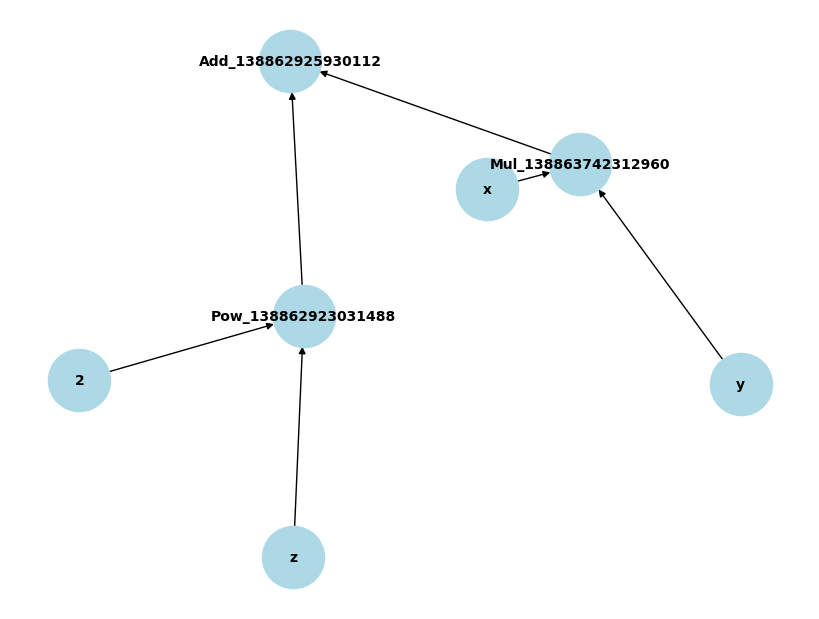

In [ ]:
import sympy as sp
import networkx as nx
import matplotlib.pyplot as plt

# Function to generate a computational graph
def build_computational_graph(expr):
    # Convert string expression to SymPy expression
    sympy_expr = sp.sympify(expr)

    # Create a directed graph
    G = nx.DiGraph()

    # Recursive function to add nodes and edges to the graph
    def add_edges(expr, parent=None):
        if isinstance(expr, sp.Symbol):
            # Add symbol as a node if it hasn't been added yet
            G.add_node(str(expr))
            if parent:
                G.add_edge(str(expr), str(parent))
        elif isinstance(expr, sp.Number):
            # Add number as a node
            G.add_node(str(expr))
            if parent:
                G.add_edge(str(expr), str(parent))
        else:
            # Handle operations like Add, Mul, etc.
            operation = type(expr).__name__  # Get the operation type (e.g., 'Add', 'Mul')
            node_label = f"{operation}_{id(expr)}"  # Unique node label for the operation
            G.add_node(node_label)
            if parent:
                G.add_edge(node_label, str(parent))

            # Recursively add edges for each argument of the operation
            for arg in expr.args:
                add_edges(arg, node_label)

    # Start building the graph from the expression root
    add_edges(sympy_expr)
    return G

# Function to visualize the computational graph
def visualize_graph(G):
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G)  # Positions for all nodes
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold')
    plt.show()

# Example usage
expression = "x * y + z**2"
G = build_computational_graph(expression)
visualize_graph(G)

In [ ]:
print(G)

DiGraph with 7 nodes and 6 edges
